# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading File

In [3]:
df = pd.read_csv("superstore_dataset.csv")
df.head(3)

,Order Date,Category,Sub-Category,Region,Sales,Profit
0,2023-01-01,Technology,NaN,North,448.53,85.15
1,2023-01-02,Technology,Accessories,West,396.39,-67.77
2,2023-01-03,Furniture,Bookcases,West,139.11,39.64


### Basic Overview

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    255 non-null    object 
 1   Category      255 non-null    object 
 2   Sub-Category  245 non-null    object 
 3   Region        255 non-null    object 
 4   Sales         255 non-null    float64
 5   Profit        245 non-null    float64
dtypes: float64(2), object(4)
memory usage: 12.1+ KB


,Sales,Profit
count,255.000000,245.000000
mean,987.215451,49.299429
std,566.986331,155.757623
min,101.480000,-309.640000
25%,478.430000,-43.850000
50%,937.450000,30.600000
75%,1488.925000,146.010000
max,1999.460000,596.480000


### Handling Null Values 

In [8]:
df.isnull().sum()

Order Date       0
Category         0
Sub-Category    10
Region           0
Sales            0
Profit          10
dtype: int64

In [14]:
df["Profit"].fillna(df["Profit"].mean(),inplace=True)
df.isnull().sum()

Order Date       0
Category         0
Sub-Category    10
Region           0
Sales            0
Profit           0
dtype: int64

In [22]:
# "Art Supplies" is the Mode of Sub-Category
df["Sub-Category"] = df["Sub-Category"].fillna(df["Sub-Category"].mode())
df.isnull().sum()

Order Date      0
Category        0
Sub-Category    9
Region          0
Sales           0
Profit          0
dtype: int64

### Handling Duplicate Values

In [24]:
df[df.duplicated]

,Order Date,Category,Sub-Category,Region,Sales,Profit
250,2023-05-23,Office Supplies,Art Supplies,South,315.76,42.88
251,2023-01-07,Technology,Accessories,West,272.15,29.72
252,2023-04-08,Furniture,Tables,South,706.05,157.05
253,2023-03-02,Technology,Accessories,East,765.15,93.77
254,2023-04-23,Technology,Phones,North,1546.87,168.78


In [26]:
df.drop_duplicates(inplace=True)

In [30]:
# All Duplicates removed Successfully
df[df.duplicated]
print("Duplicates Removed Successfully")

Duplicates Removed Successfully


# Key Visualizations

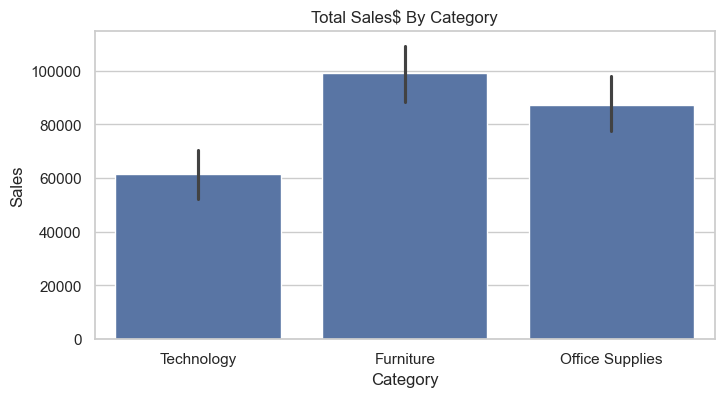

In [41]:
plt.figure(figsize=(8,4))
sns.set(style="whitegrid")
sns.barplot(data = df , x="Category"  ,y="Sales" , estimator=sum )
plt.title("Total Sales$ By Category")
plt.show()

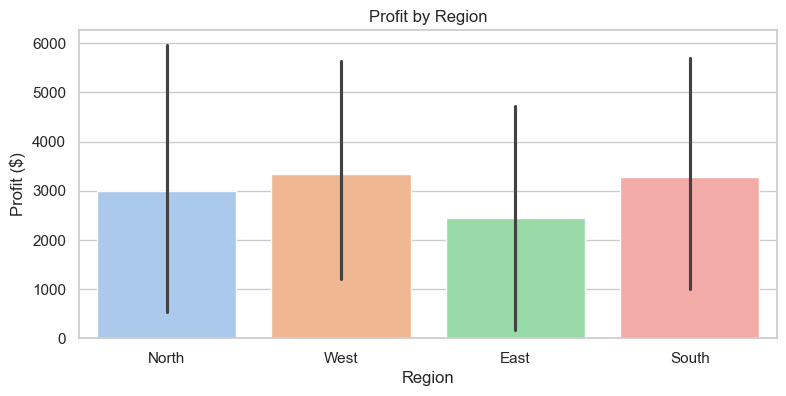

In [66]:
plt.figure(figsize=(9,4))
sns.barplot(data = df ,x="Region" , y="Profit" , estimator=sum , hue="Region" ,palette="pastel")
plt.title("Profit by Region")
plt.ylabel("Profit ($)")
plt.show()

In [74]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Month"] = df["Order Date"].dt.month
df.head(2)

,Order Date,Category,Sub-Category,Region,Sales,Profit,Month
0,2023-01-01,Technology,Art Supplies,North,448.53,85.15,1
1,2023-01-02,Technology,Accessories,West,396.39,-67.77,1


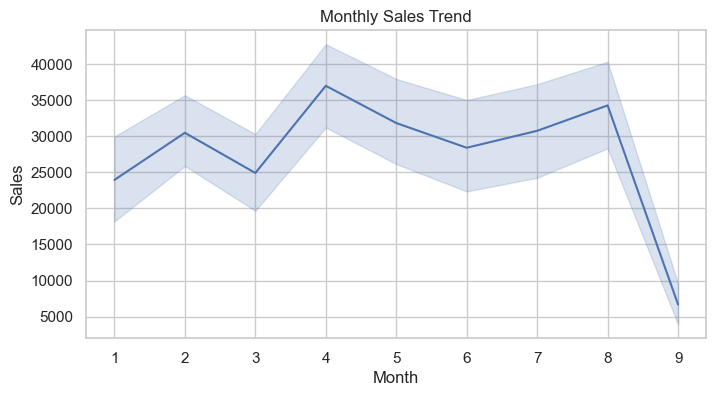

In [79]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df , x="Month" ,  y="Sales" , estimator=sum )
plt.title("Monthly Sales Trend")
plt.show()

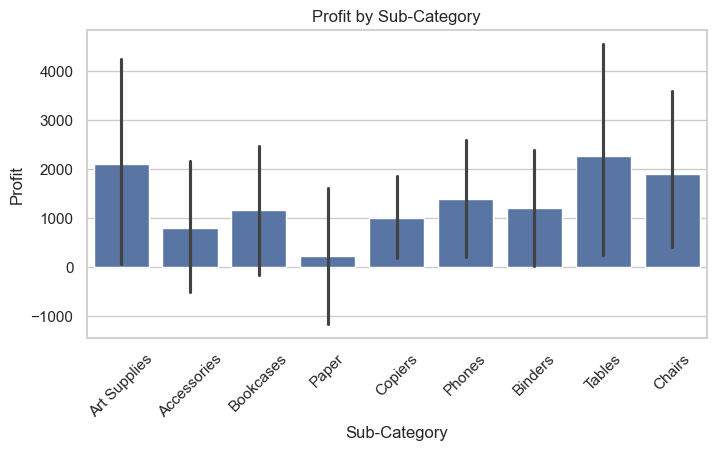

In [85]:
plt.figure(figsize=(8,4))
sns.barplot(data=df , x="Sub-Category" , y="Profit" ,estimator=sum)
plt.title("Profit by Sub-Category")
plt.xticks(rotation=45)
plt.show()

# Insights

### Project by : Shoaib
### Github : https://github.com/shoaib-data (shoaib-data)
### Linkedin : www.linkedin.com/in/shoaib99 